In [6]:
import numpy as np
import scipy.optimize as SciOpt
import scipy.stats as SciStat
import scipy.special as SciSpec
from numpy import random as rnd
from numpy import linalg as LA
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
#First we need to import data
#I am using pathlib to make path string
#platform indepenedent
from pathlib import Path
Folder = Path("G:/Classes/PHYS5730-7730/2022/hwk 3/")
File1 = Folder / "D1.txt"
File2 = Folder / "D2.txt"
File3 = Folder / "D3.txt"
File4 = Folder / "D4.txt"
File5 = Folder / "D5.txt"

#Now just read each file in.
#There is just one number per line
#so no split of line necessary.
d1=[]; d2=[]; d3=[]; d4=[]; d5=[]; 
with open(File1) as f:
    for line in f:
        d1.append(float(line))
d1=np.array(d1)
with open(File2) as f:
    for line in f:
        d2.append(float(line))
with open(File3) as f:
    for line in f:
        d3.append(float(line))
with open(File4) as f:
    for line in f:
        d4.append(float(line))
with open(File5) as f:
    for line in f:
        d5.append(float(line))
d1=np.array(d1)
d2=np.array(d2)
d3=np.array(d3)
d4=np.array(d4)
d5=np.array(d5)

------------------------------------------------------
=========================D1===========================
------------------------------------------------------


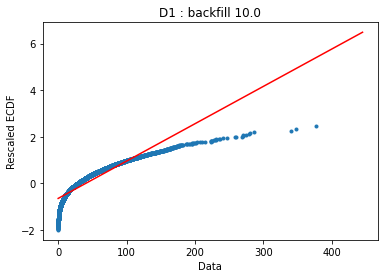

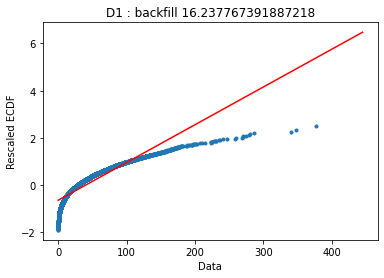

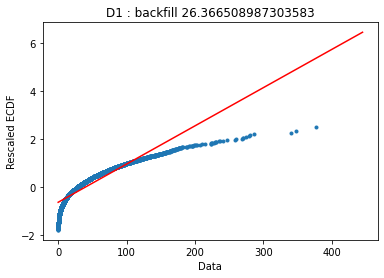

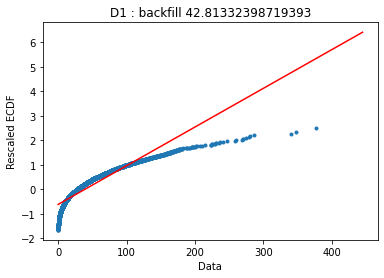

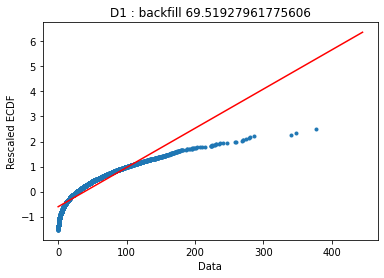

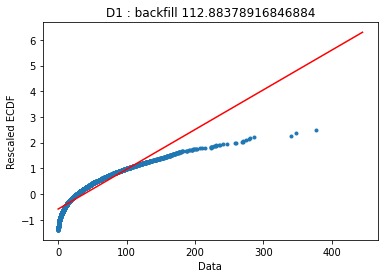

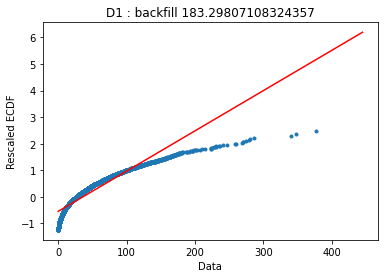

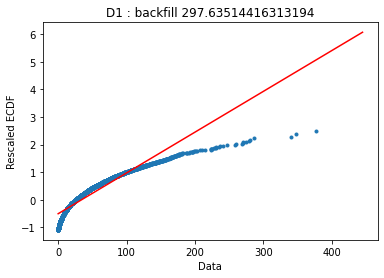

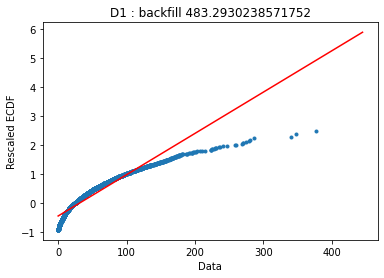

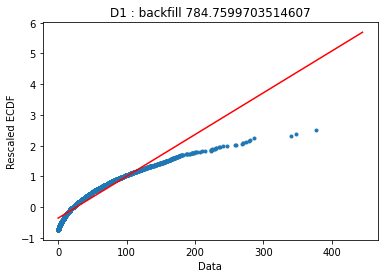

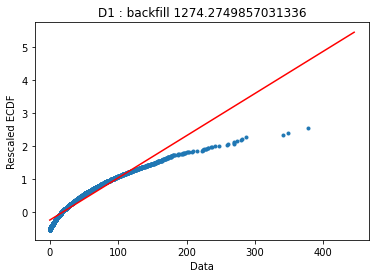

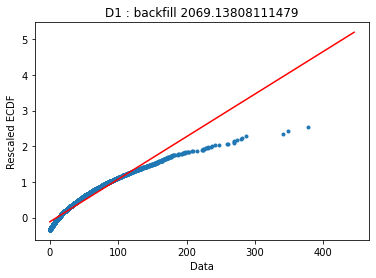

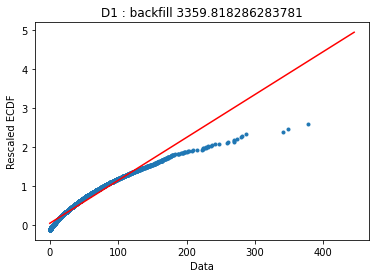

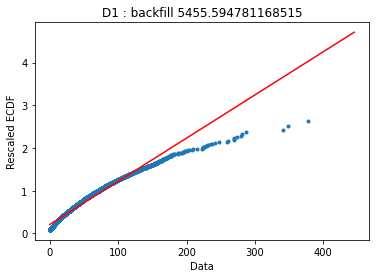

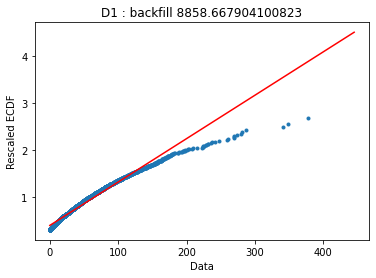

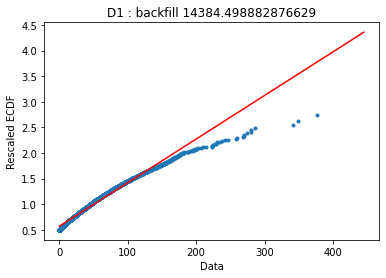

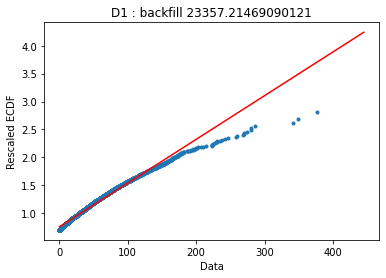

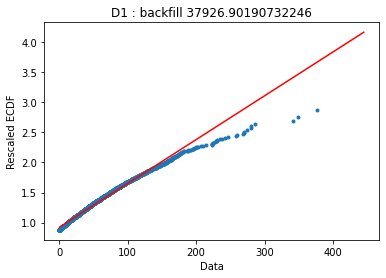

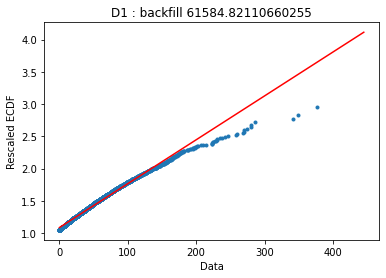

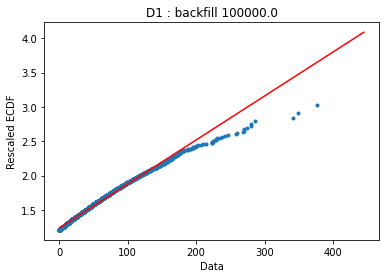

------------------------------------------------------
=========================D2===========================
------------------------------------------------------


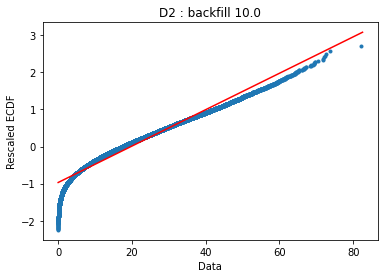

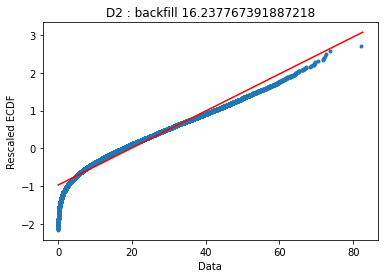

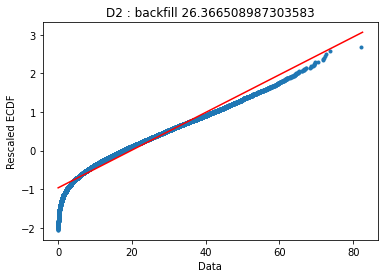

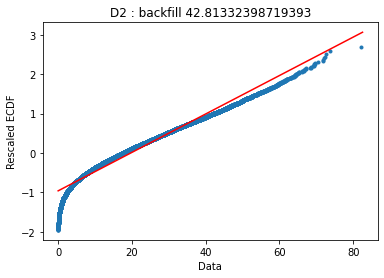

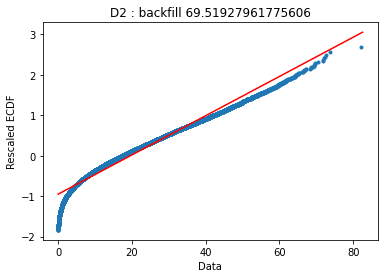

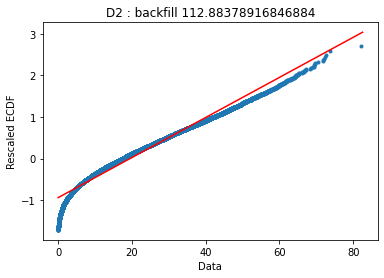

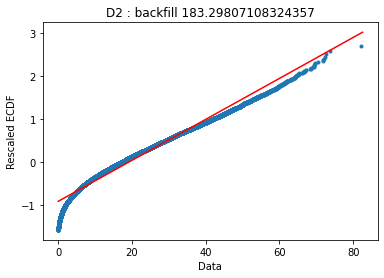

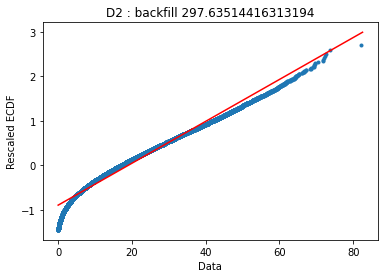

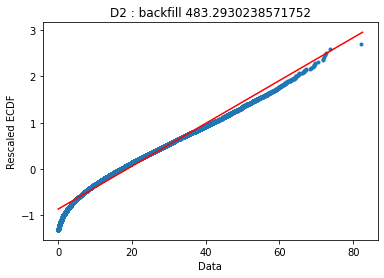

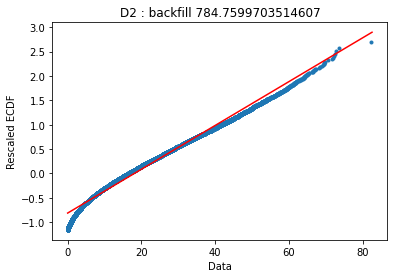

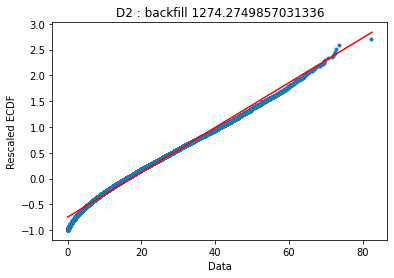

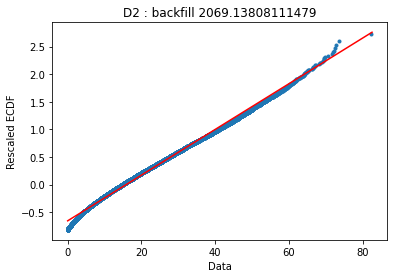

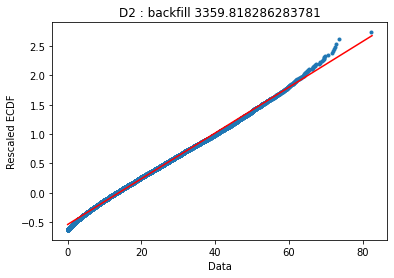

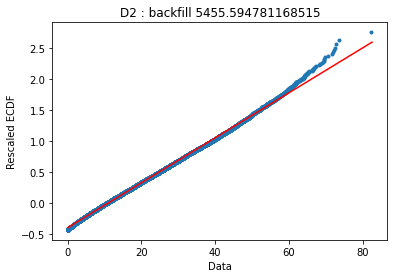

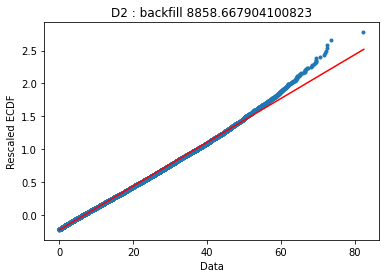

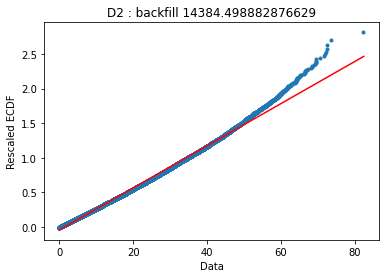

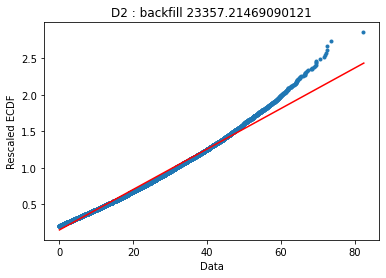

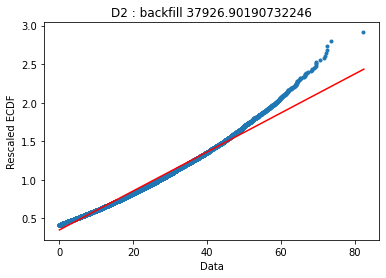

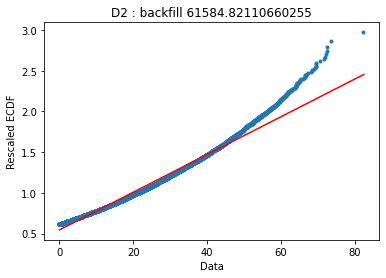

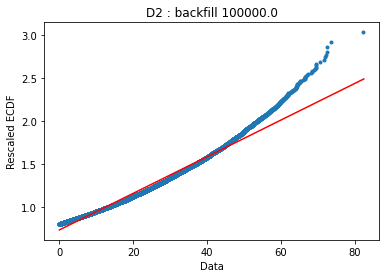

------------------------------------------------------
=========================D3===========================
------------------------------------------------------


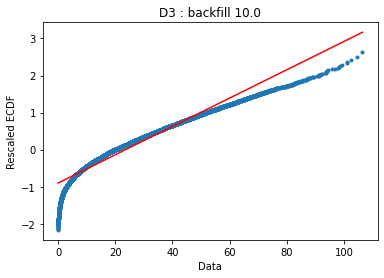

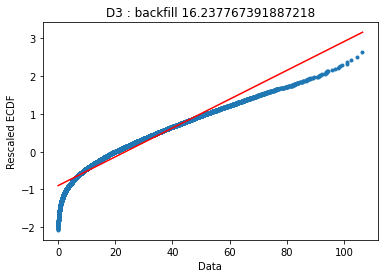

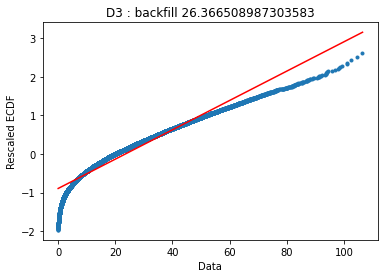

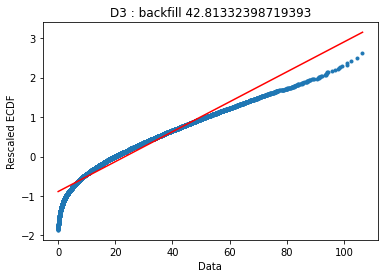

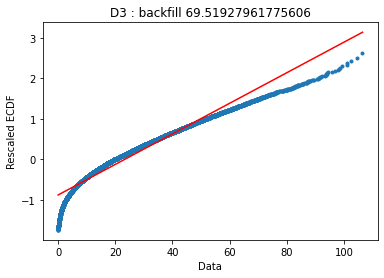

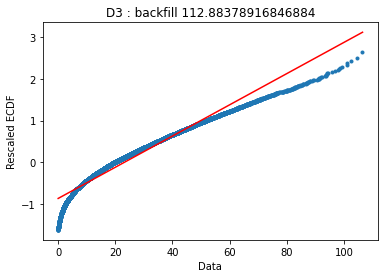

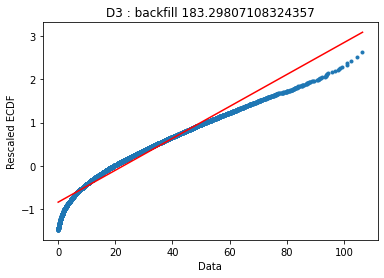

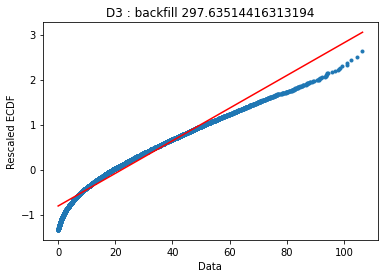

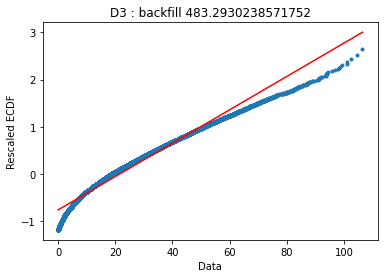

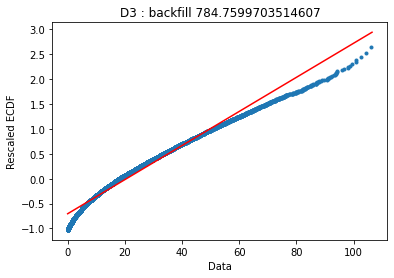

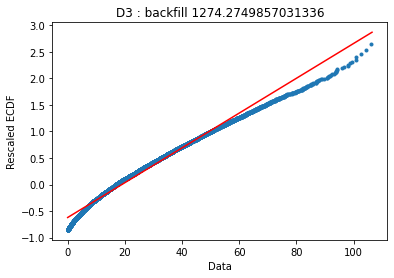

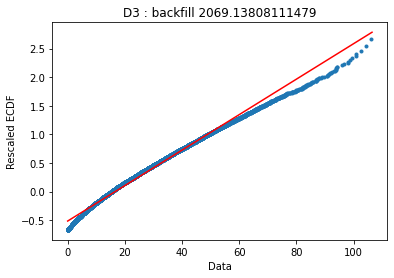

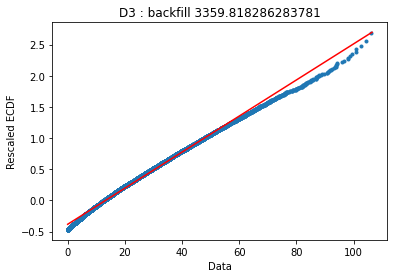

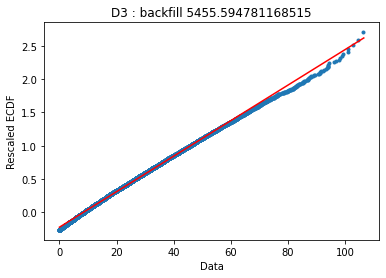

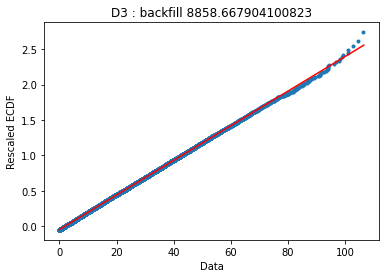

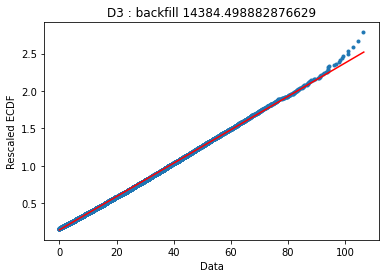

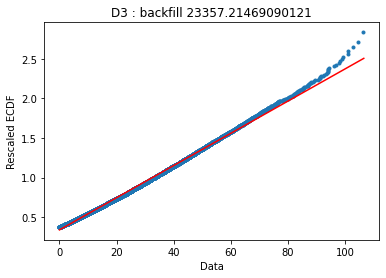

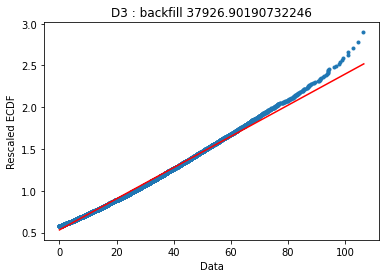

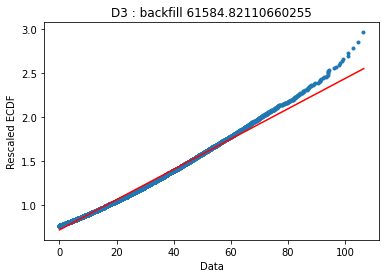

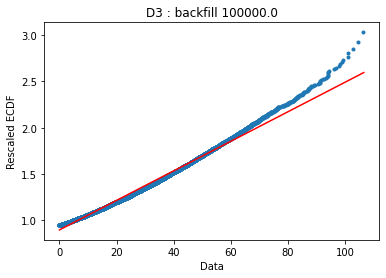

------------------------------------------------------
=========================D4===========================
------------------------------------------------------


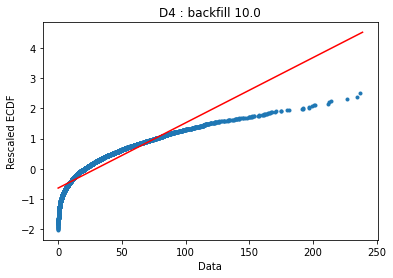

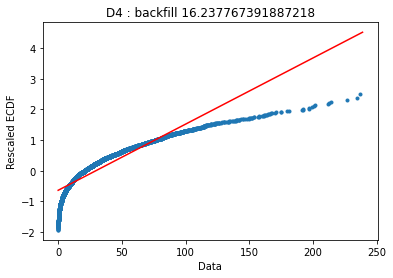

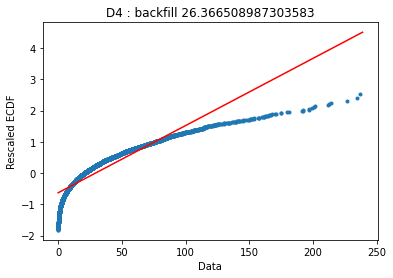

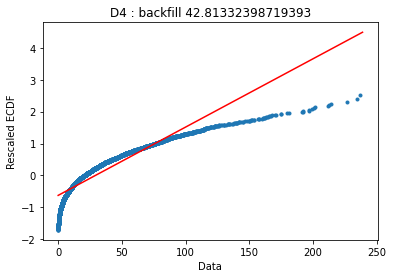

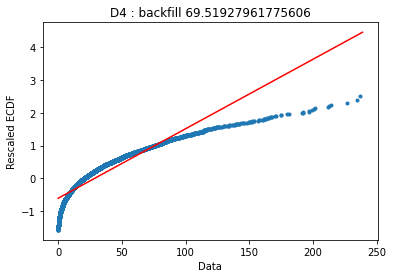

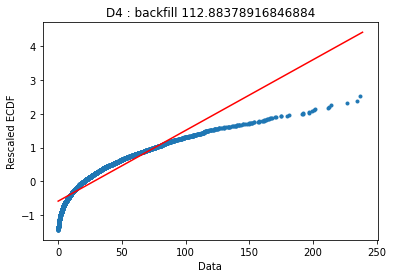

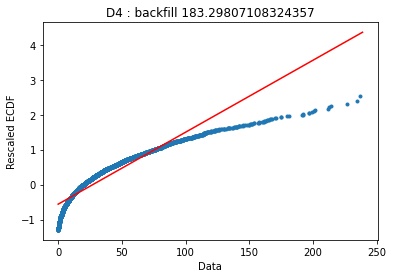

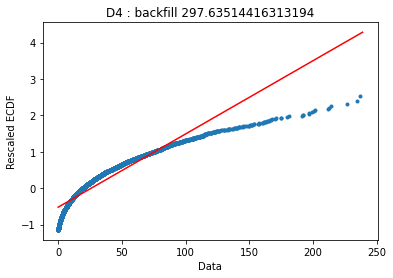

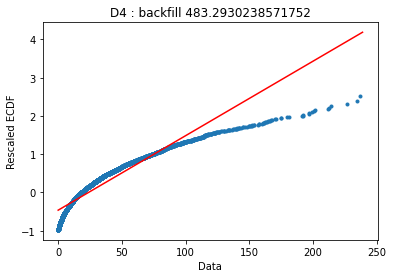

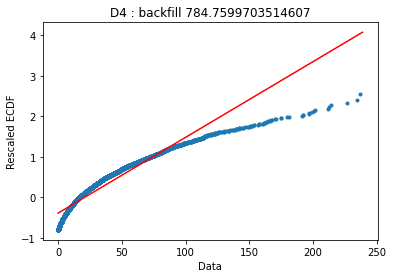

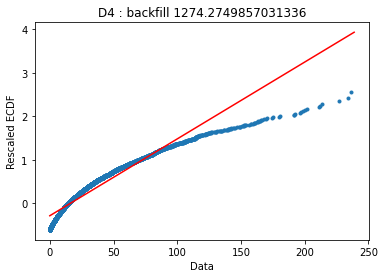

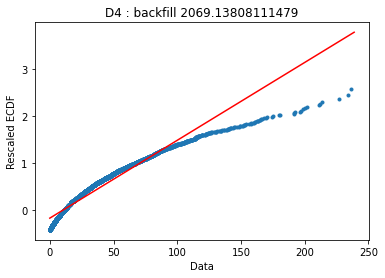

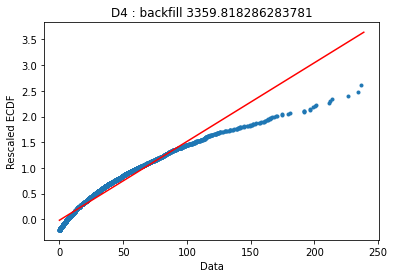

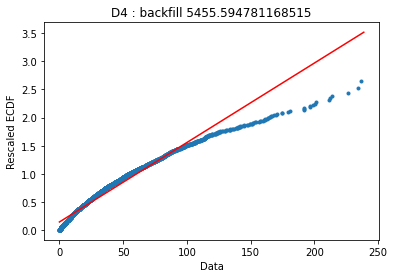

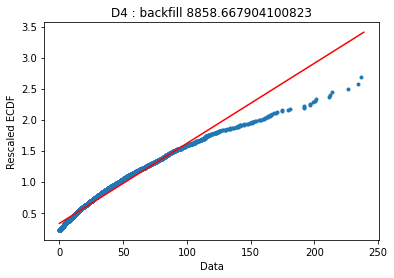

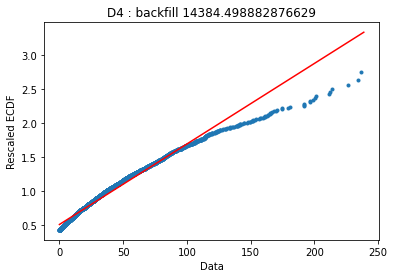

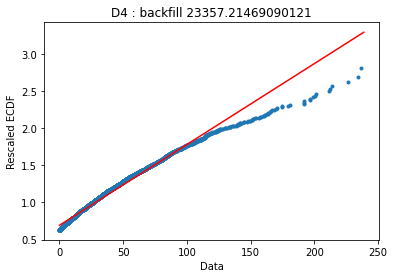

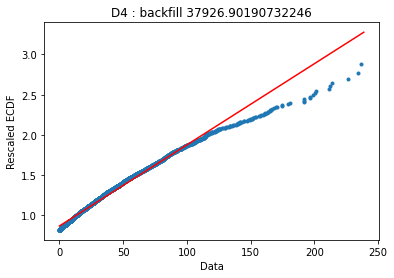

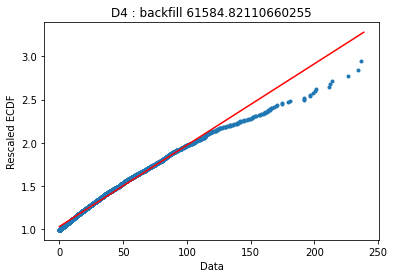

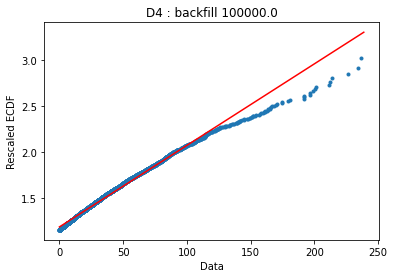

------------------------------------------------------
=========================D5===========================
------------------------------------------------------


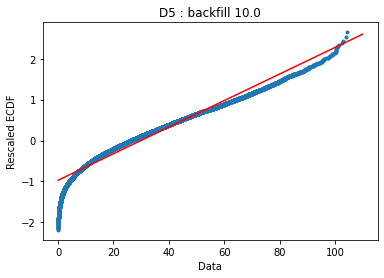

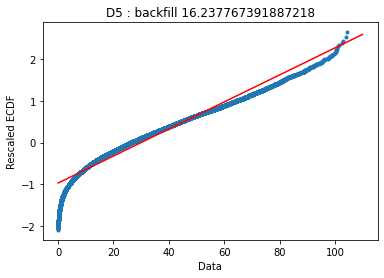

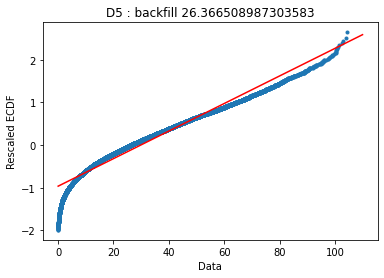

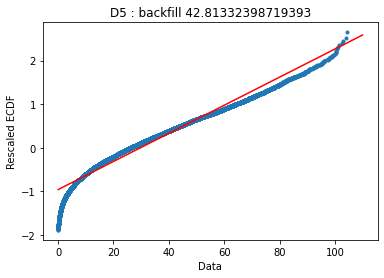

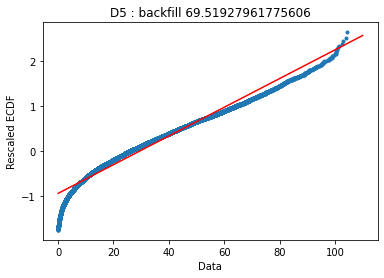

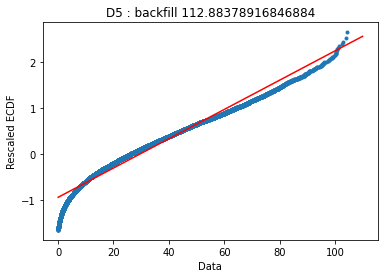

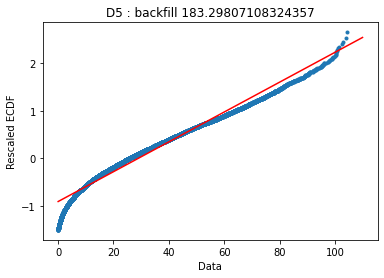

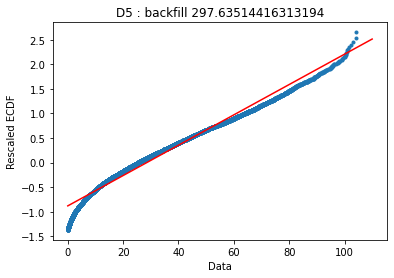

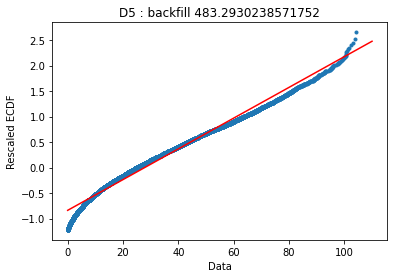

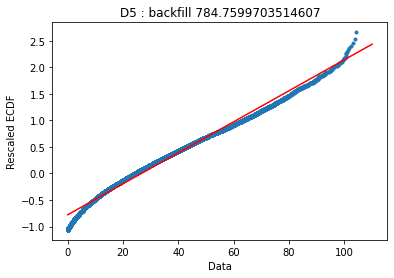

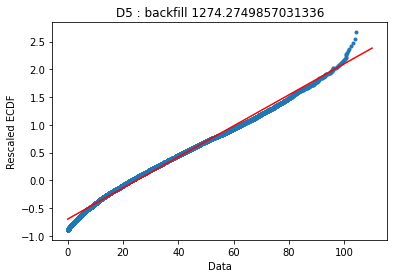

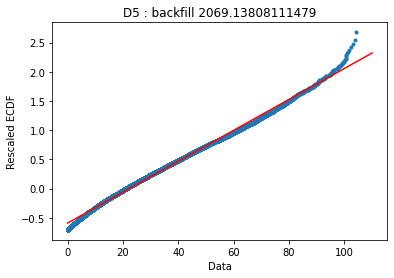

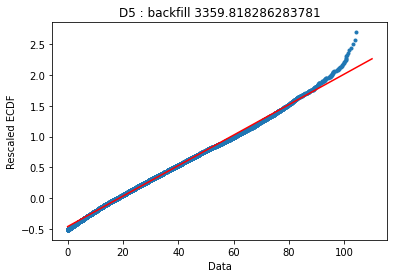

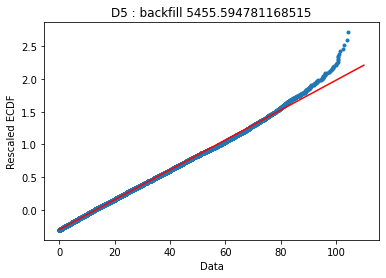

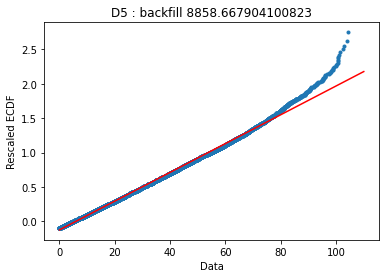

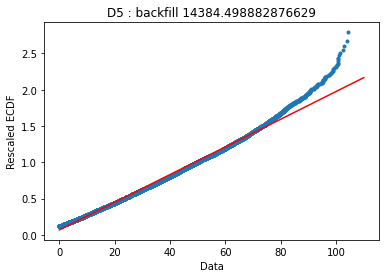

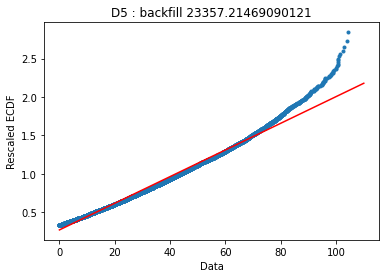

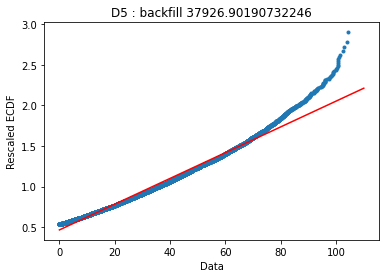

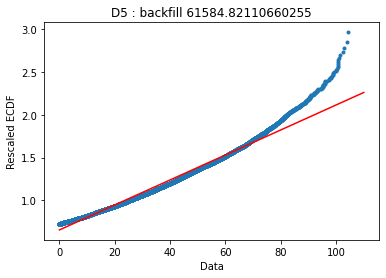

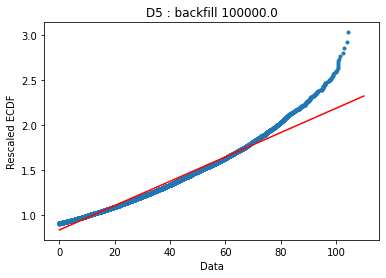

In [8]:
#Lognormal
def test_logN(x,label):
    N=len(x)
    for numTR in np.logspace(1,5,20):
        #first we calculate ECDF
        C=int(numTR)
        ecdfX=np.sort(x)
        ecdfY=np.linspace(C+1,N+C,N)/(N+C)
        #Now we rescale things to generate normal probplot
        probplotX=ecdfX
        probplotY=SciSpec.erfinv(2*ecdfY-1)
        #plot the result
        plt.plot(probplotX,probplotY,'.')
        #fit the data to a straight line
        #note that we exclude the zeros we prepended
        fitP=np.polyfit(probplotX[:-5],probplotY[:-5],1)
        #plot the line fit
        plt.plot(probplotX,np.polyval(fitP,probplotX),'r')
        #give it proper xlabel, ylabel, and title
        plt.title(label + ' : backfill ' + str(numTR))
        plt.ylabel('Rescaled ECDF')
        plt.xlabel('Data')
        plt.show()
print('------------------------------------------------------')
print('=========================D1===========================')
print('------------------------------------------------------')
test_logN(np.log(d1),'D1')
print('------------------------------------------------------')
print('=========================D2===========================')
print('------------------------------------------------------')
test_logN(np.log(d2),'D2')
print('------------------------------------------------------')
print('=========================D3===========================')
print('------------------------------------------------------')
test_logN(np.log(d3),'D3')
print('------------------------------------------------------')
print('=========================D4===========================')
print('------------------------------------------------------')
test_logN(np.log(d4),'D4')
print('------------------------------------------------------')
print('=========================D5===========================')
print('------------------------------------------------------')
test_logN(np.log(d5),'D5')
#
#probplot for d3 becomes linear at one point, all others don't
#
#Conclusion #1: d3 is lognormal

------------------------------------------------------
=========================D1===========================
------------------------------------------------------


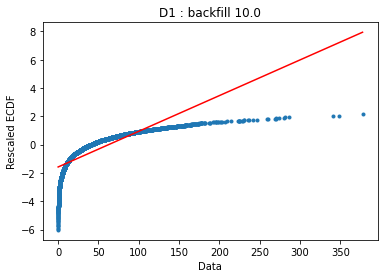

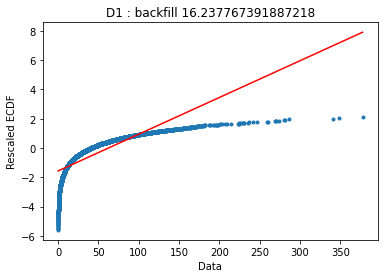

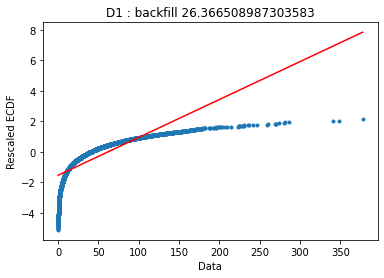

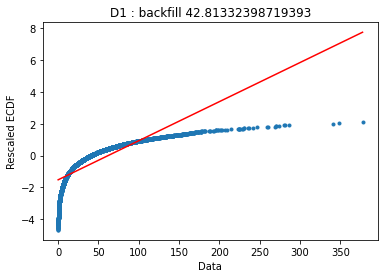

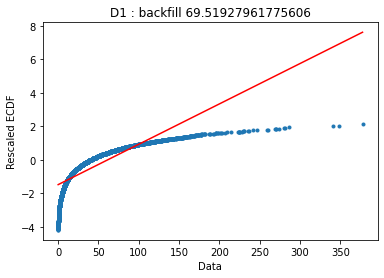

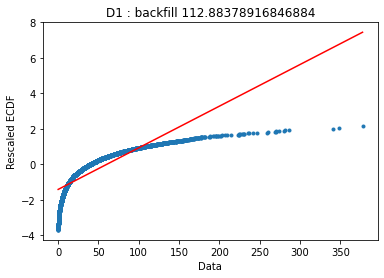

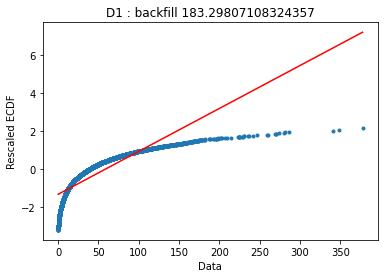

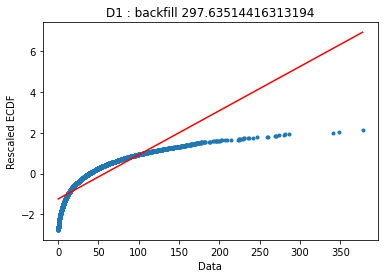

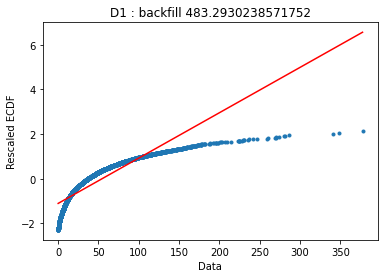

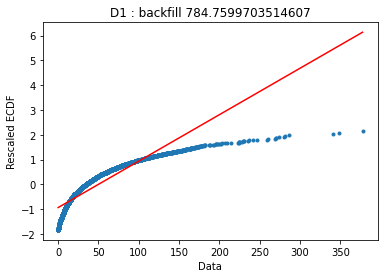

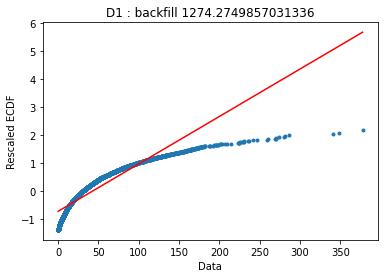

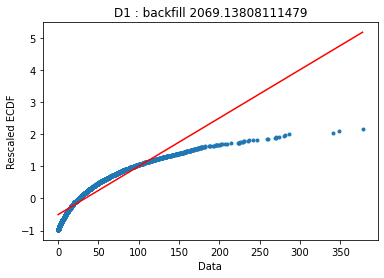

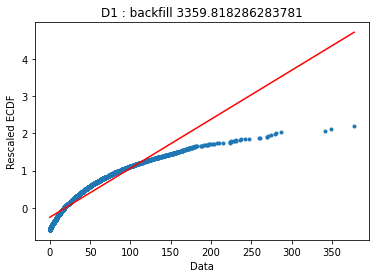

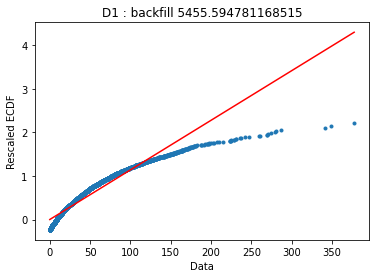

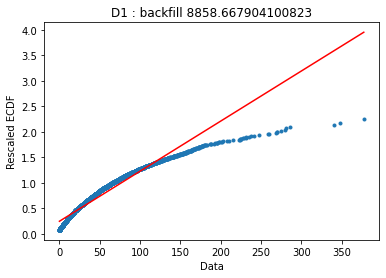

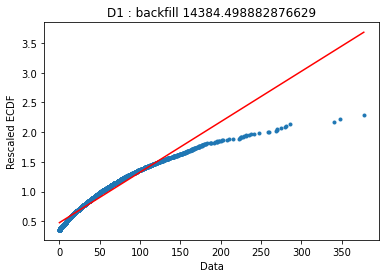

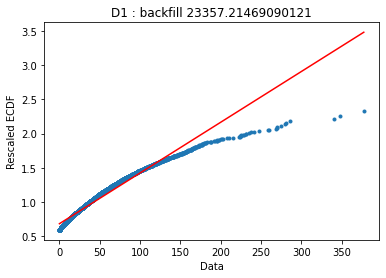

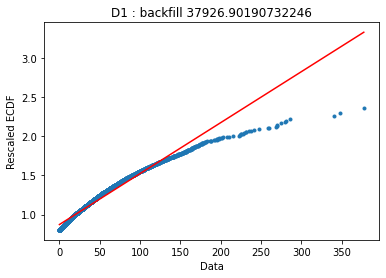

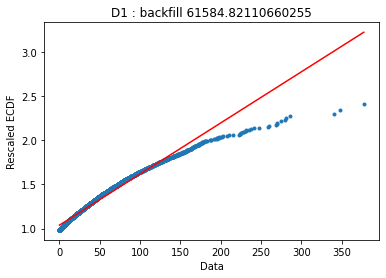

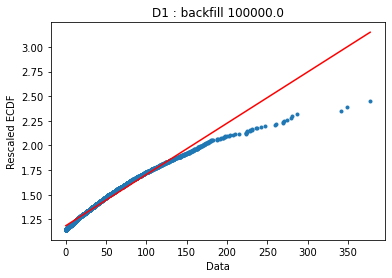

------------------------------------------------------
=========================D2===========================
------------------------------------------------------


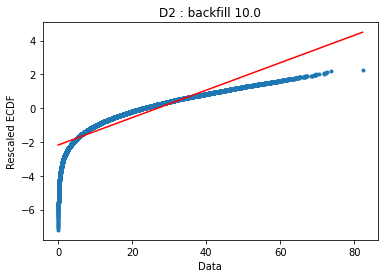

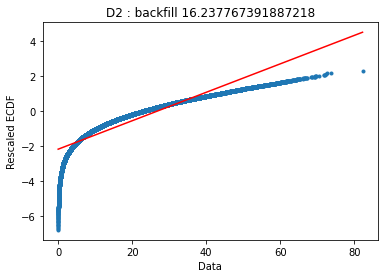

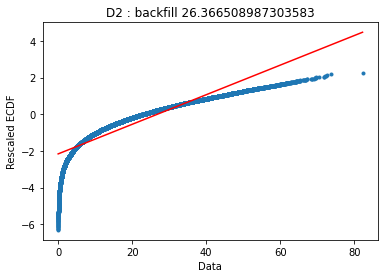

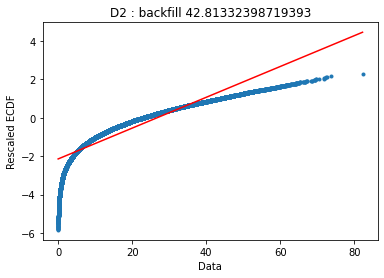

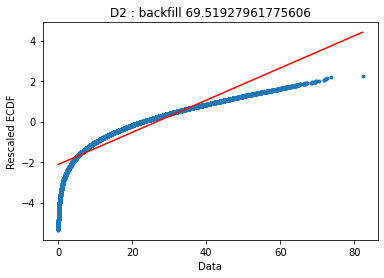

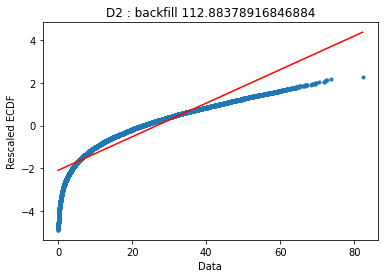

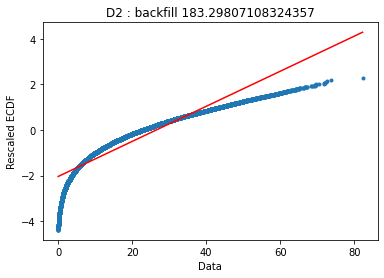

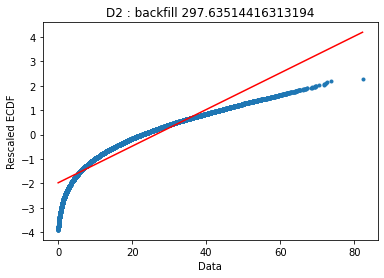

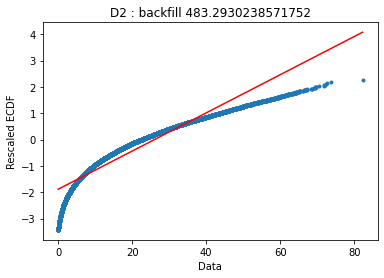

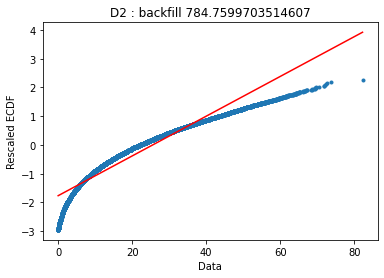

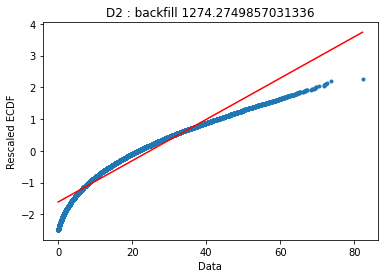

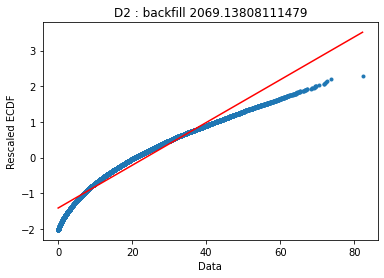

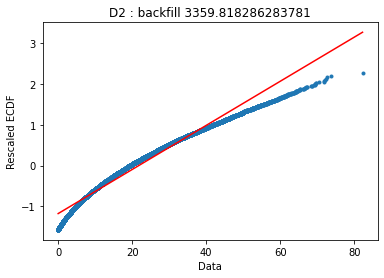

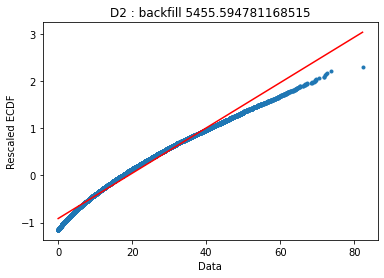

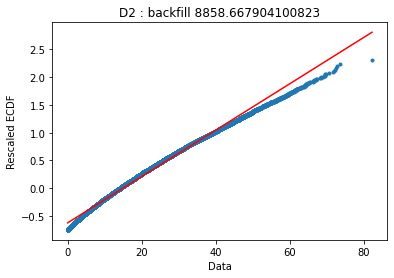

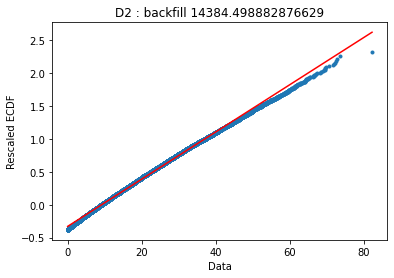

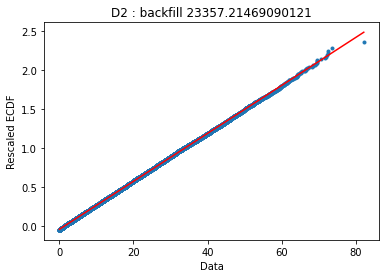

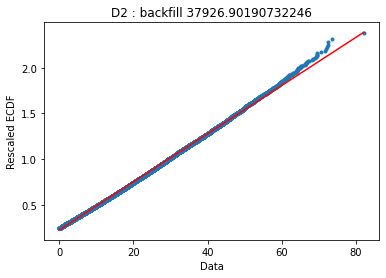

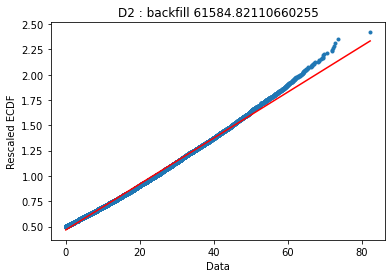

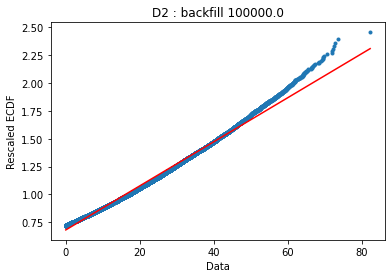

------------------------------------------------------
=========================D4===========================
------------------------------------------------------


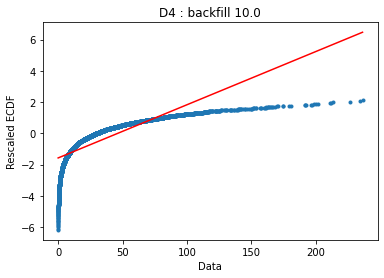

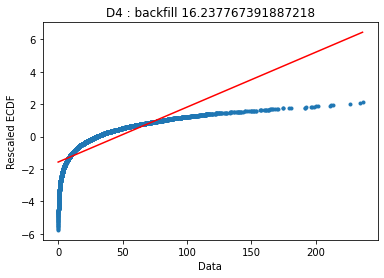

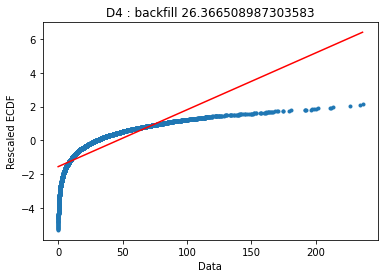

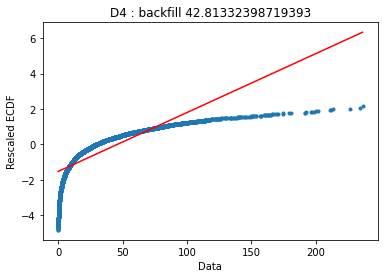

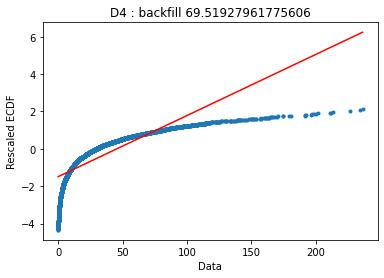

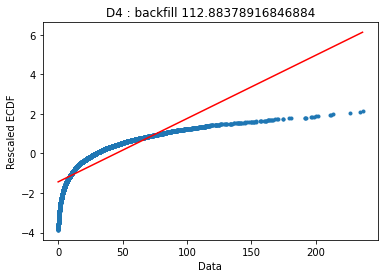

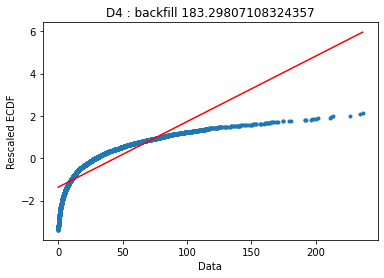

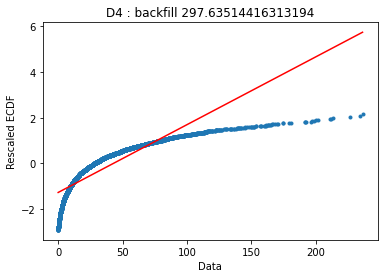

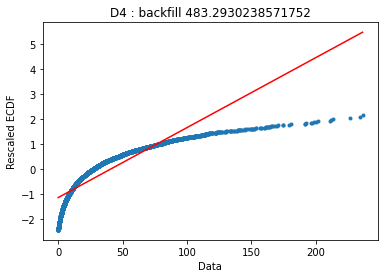

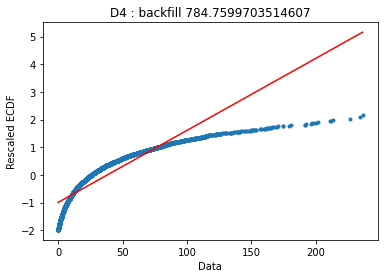

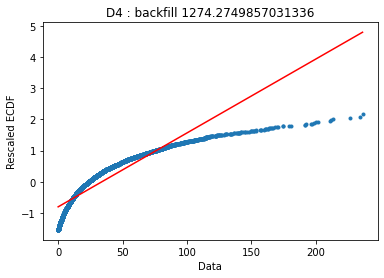

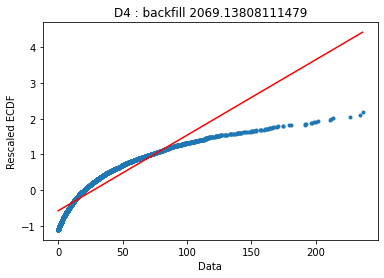

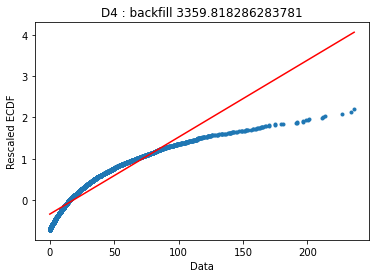

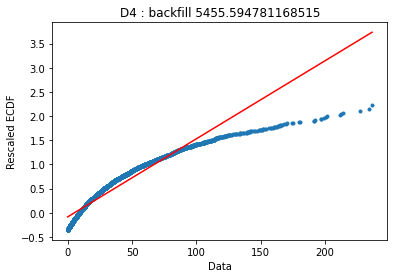

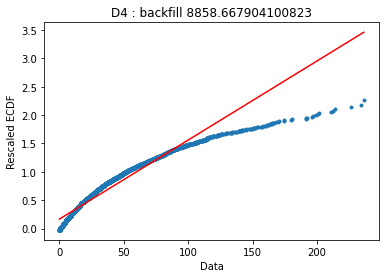

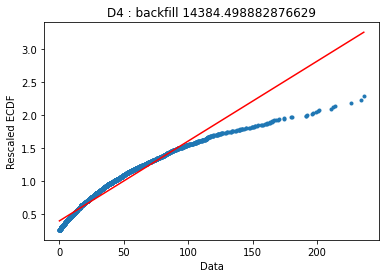

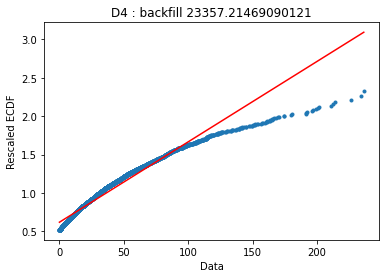

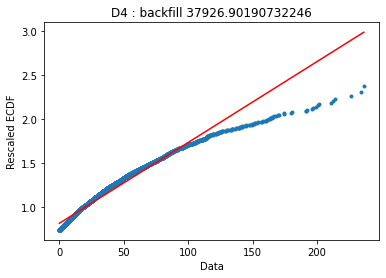

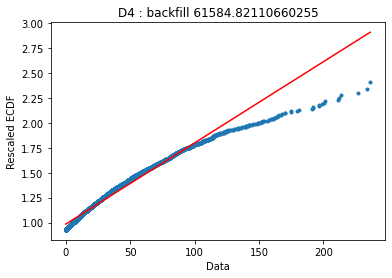

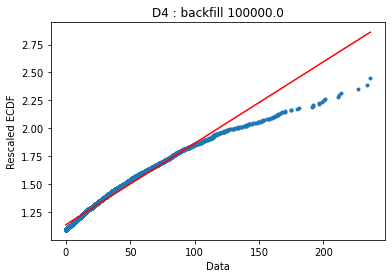

------------------------------------------------------
=========================D5===========================
------------------------------------------------------


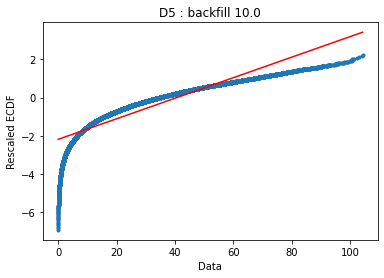

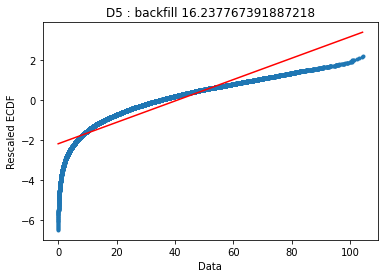

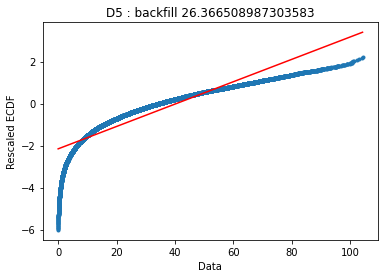

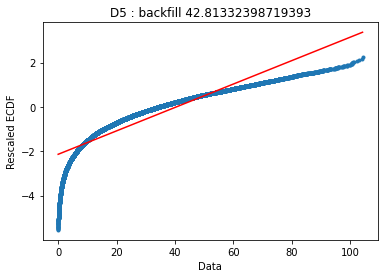

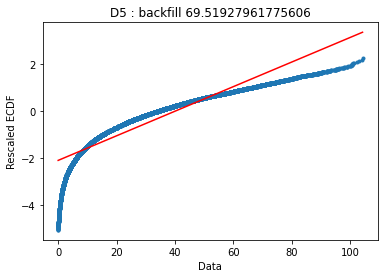

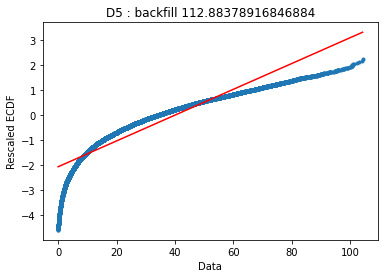

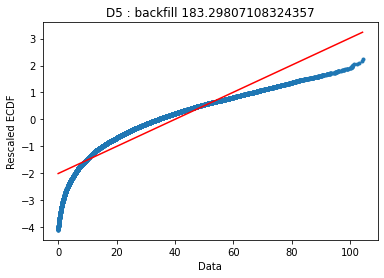

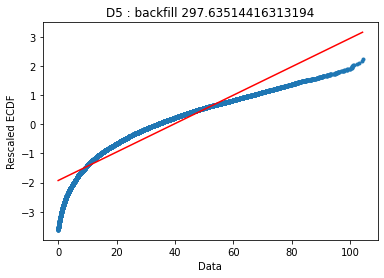

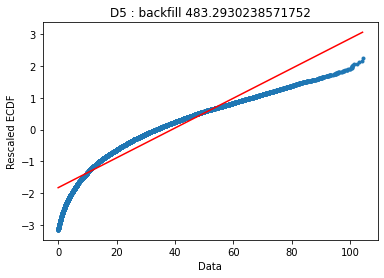

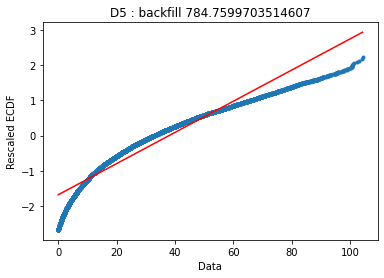

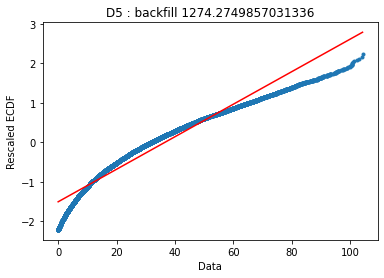

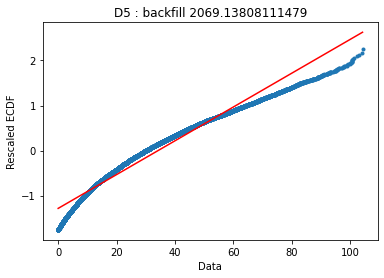

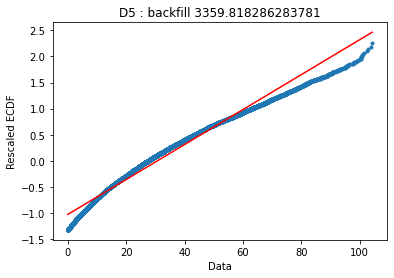

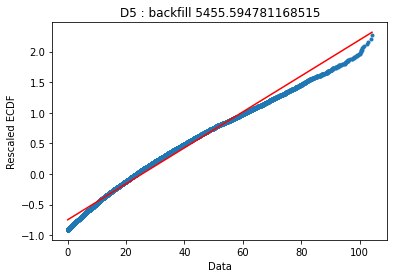

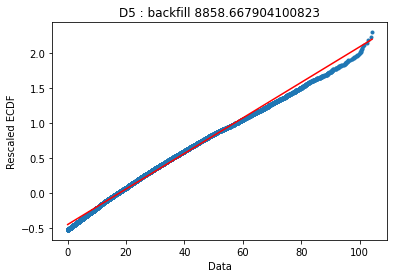

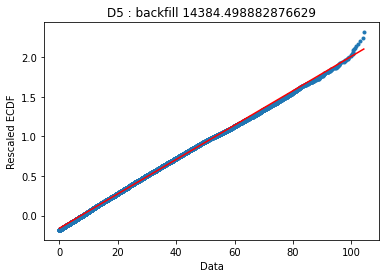

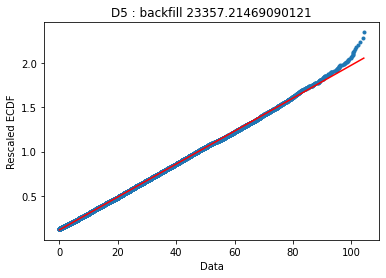

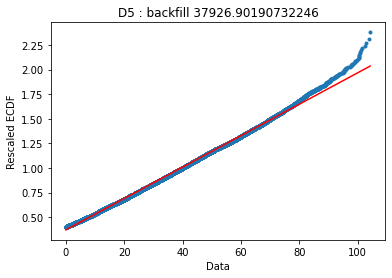

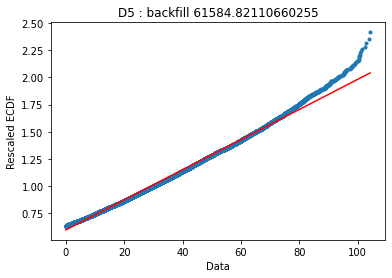

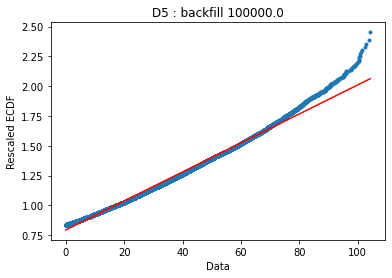

In [267]:
#Weibull
def test_WeiN(x,label):
    N=len(x)
    for numTR in np.logspace(1,5,20):
        #first we calculate ECDF
        C=int(numTR)
        ecdfX=np.sort(x)
        ecdfY=np.linspace(C+1,N+C,N)/(N+C)
        #Now we rescale things to generate Weibull probplot
        probplotX=np.log(ecdfX[:-1])
        probplotY=np.log(np.log(np.power(1-ecdfY[:-1],-1)))
        #plot the result
        plt.plot(probplotX,probplotY,'.')
        #fit the data to a straight line
        #note that we exclude the zeros we prepended
        fitP=np.polyfit(probplotX[:-5],probplotY[:-5],1)
        #plot the line fit
        plt.plot(probplotX,np.polyval(fitP,probplotX),'r')
        #give it proper xlabel, ylabel, and title
        plt.title(label + ' : backfill ' + str(numTR))
        plt.ylabel('Rescaled ECDF')
        plt.xlabel('Data')
        plt.show()
print('------------------------------------------------------')
print('=========================D1===========================')
print('------------------------------------------------------')
test_WeiN(d1,'D1')
print('------------------------------------------------------')
print('=========================D2===========================')
print('------------------------------------------------------')
test_WeiN(d2,'D2')
print('------------------------------------------------------')
print('=========================D4===========================')
print('------------------------------------------------------')
test_WeiN(d4,'D4')
print('------------------------------------------------------')
print('=========================D5===========================')
print('------------------------------------------------------')
test_WeiN(d5,'D5')
#
#Conclusion #3: dist{2} and dist{5} are Weibull 

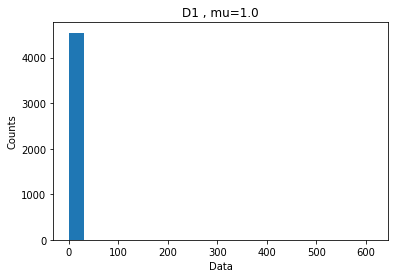

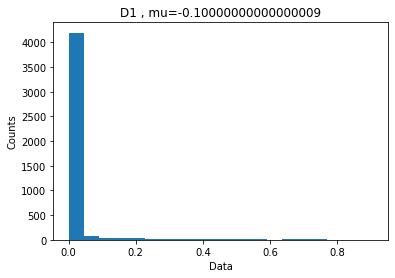

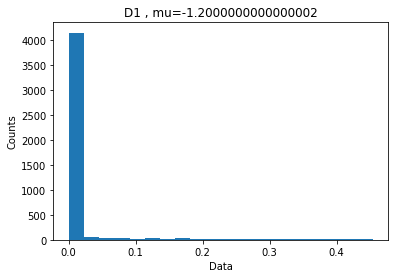

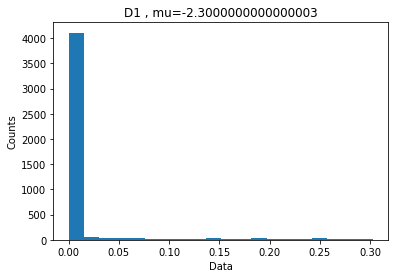

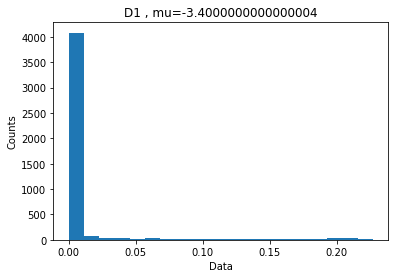

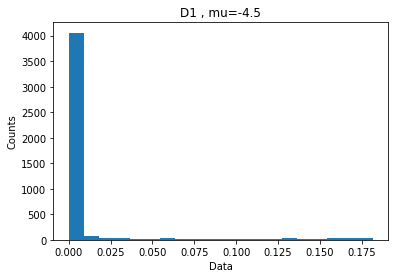

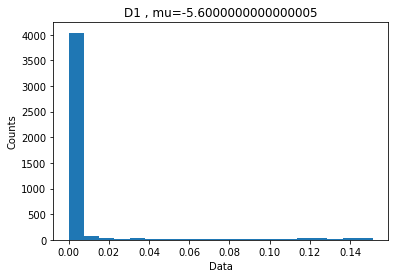

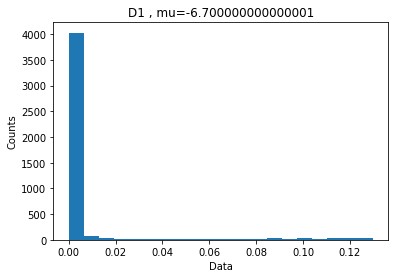

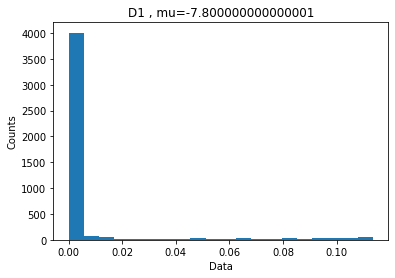

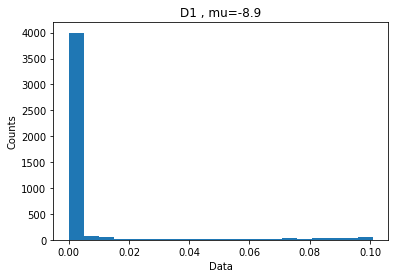

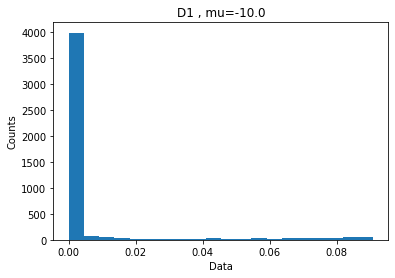

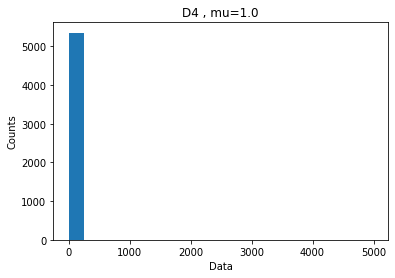

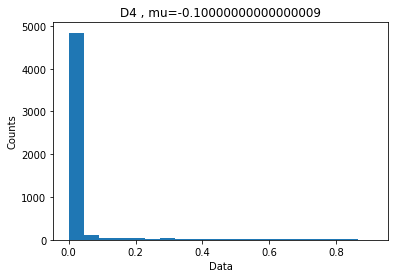

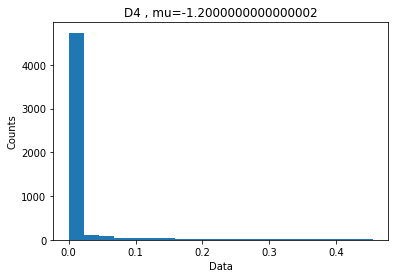

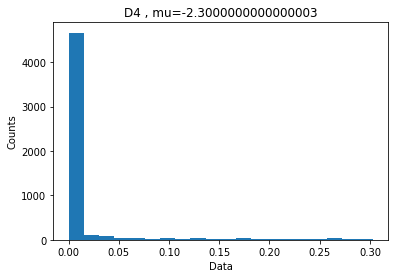

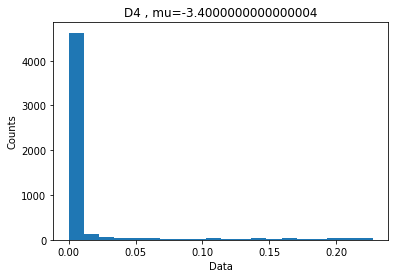

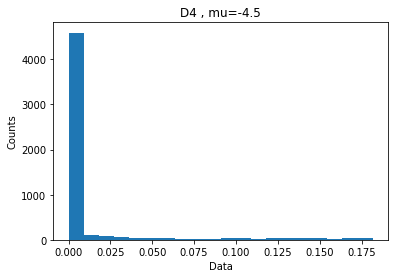

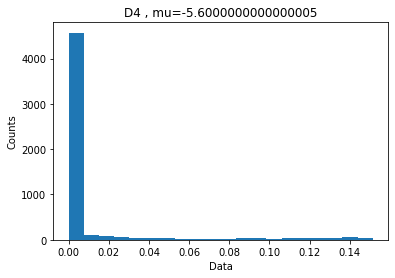

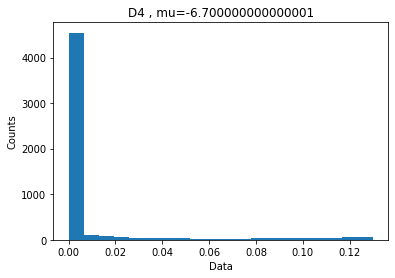

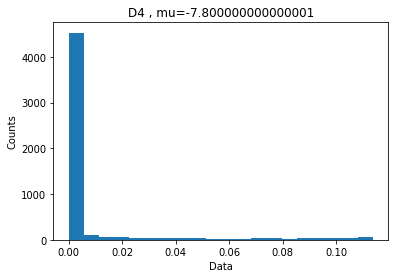

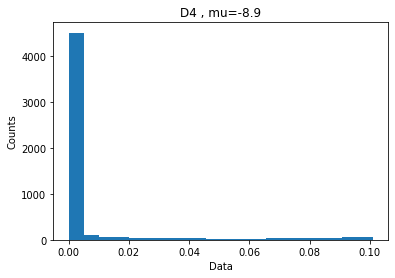

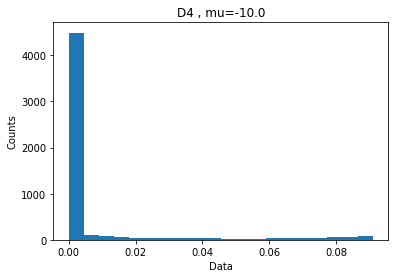

In [9]:
#We cannot do Pareto probplot without estimating parameters
#Hmm...
#But now we are down to Pareto vs Levy so we use another hack
#If data X is Levy then 1/sqrt(X-mu) is folded normal.
#Of course we do not know mu but for Levy distribution
#the PDF starts at mu and our lowest values are 1 so mu<1
#Now we just test a bunch of values for mu
for mu in np.linspace(1,-10,11):
    testdist=np.power(d1-mu,-1)
    plt.hist(testdist,20)
    #give it proper xlabel, ylabel, and title
    plt.title('D1 , mu=' + str(mu))
    plt.ylabel('Counts')
    plt.xlabel('Data')
    plt.show()
#This does not look like folded Gaussian
#and as mu decreases, there is a rising tail
#so going to lower mu is pointless
#Ergo: D1 is Pareto
for mu in np.linspace(1,-10,11):
    testdist=np.power(d4-mu,-1)
    plt.hist(testdist,20)
    #give it proper xlabel, ylabel, and title
    plt.title('D4 , mu=' + str(mu))
    plt.ylabel('Counts')
    plt.xlabel('Data')
    plt.show()
#This does not look like folded Gaussian
#and as mu decreases, there is a rising tail
#so going to lower mu is pointless
#Ergo: D4 is Pareto